# End to End ML Project - California Housing Prediction

## Machine Learning Type

supervised - Regression

## Skills

1. Python
2. Pandas
3. Numpy
4. Matplotlib
5. scikit-learn
6. Data visualization
7. Treating missing values in dataset
8. Handling categorical variables
9. Creating transformation pipelines
10. Training Machine Learning models

## Dataset

Dataset is based on data from the 1990 California census.

It is located at `/cxldata/datasets/bootml/Housing_California_1`

## Get Data

In [3]:
#importing pandas and 
import pandas as pd

In [4]:
#reading the file
housing = pd.read_csv("/cxldata/datasets/project/housing/housing.csv")

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# The info() method is useful to get a quick description of the data
# in particular the total number of rows,
# and each attribute’s type and number of non-null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Find out what categories exist for the categorical fields by using the value_counts() method
# And let's drop the rows which has missing categoical value

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# The describe() method shows a summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
#Data visualization
#importing matplotlib

%matplotlib inline
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb8bc93390>,
      dtype=object)

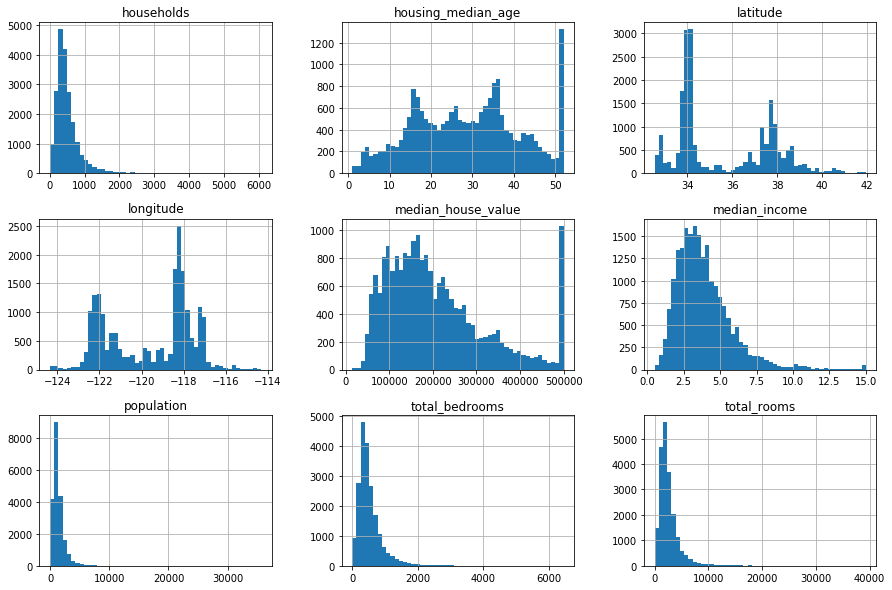

In [10]:
# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres

housing.hist(bins = 50, figsize = (15,10))

In [11]:
# find out that the median_income is an important attribute to predict median_house_value
# want to ensure that the test set is representative of the various categories of income in the whole dataset. 
#Since the median_income is a continuous numerical attribute, we first need to convert it into a categorical attribute.
#Categorize the median_income attribute of our dataset in 5 categories 

income_cat = pd.cut(housing["median_income"], bins=[0,1.5,3,4.5,6,16], labels = [1,2,3,4,5])

In [12]:
income_cat.head()

0    5
1    5
2    5
3    4
4    3
Name: median_income, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [13]:
#use the StratifiedShuffleSplit class from sklearn library to perform stratified sampling.

import sklearn 
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
#reate an object of class StratifiedShuffleSplit of name split_object
#n_splits is specify it as 1 because we don;t want to perform cross validation here. We only want to perform stratified split.
#split our dataset in a 80:20 train:test ratio.

split_object = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [15]:
print(split_object)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)


In [16]:
#Generating test set- Splitting

gen_obj = split_object.split(housing, income_cat)

In [17]:
print(gen_obj)

<generator object BaseShuffleSplit.split at 0x7fcbbc062e60>


In [18]:
#Generating Test Set-Indices

train_ind, test_ind = next(gen_obj)

In [19]:
print(train_ind)

[17606 18632 14650 ... 13908 11159 15775]


In [20]:
print(test_ind)

[ 5241 10970 20351 ...  4019 12107  2398]


In [21]:
print(income_cat)

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: median_income, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [22]:
#Generating test set- Locating data

strat_train_set = housing.loc[train_ind]
strat_test_set = housing.loc[test_ind]

In [23]:
print(strat_train_set)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  media

We have split the data into training and testing sets. Generating the test set is a critical part of a Machine Learning project but is often neglected.

Now, we'll work only on training data and keep the testing data aside until prediction.

## Explore the Data to gain Insights

In [24]:
# copying the train data to explore the data

train_copy= strat_train_set.copy()

In [25]:
print(train_copy)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  media

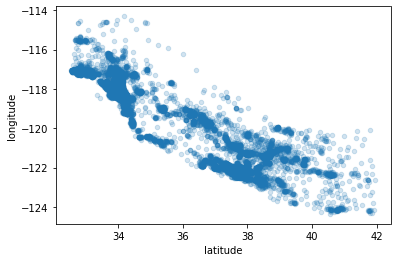

In [26]:
# Visualizing geographical data

train_copy.plot(kind = "scatter", x = "latitude", y = "longitude", alpha = 0.2)

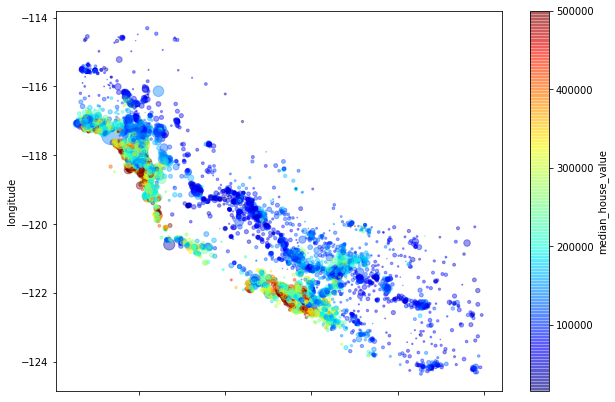

In [27]:
#Visualizing the target variable (median_house_value).

train_copy.plot(kind = "scatter", x="latitude", y = "longitude", s =train_copy["population"]/100, c = "median_house_value", cmap = "jet", colorbar = True, figsize = (10,7), alpha = 0.4)

In [28]:
#Looking for correlations - better understanding of the data variation.

train_copy.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [29]:
#Computing correlation matrix

train_copy[["median_house_value", "median_income", "latitude", "housing_median_age", "total_rooms"]]

,median_house_value,median_income,latitude,housing_median_age,total_rooms
17606,286600.0,2.7042,37.29,38.0,1568.0
18632,340600.0,6.4214,37.05,14.0,679.0
14650,196900.0,2.8621,32.77,31.0,1952.0
3230,46300.0,1.8839,36.31,25.0,1847.0
3555,254500.0,3.0347,34.23,17.0,6592.0
...,...,...,...,...,...
6563,240200.0,4.9312,34.20,46.0,1271.0
12053,113000.0,2.0682,33.88,40.0,1196.0
13908,97800.0,3.2723,34.09,9.0,4855.0
11159,225900.0,4.0625,33.82,31.0,1960.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb87a1eac8>,
      dtype=object)

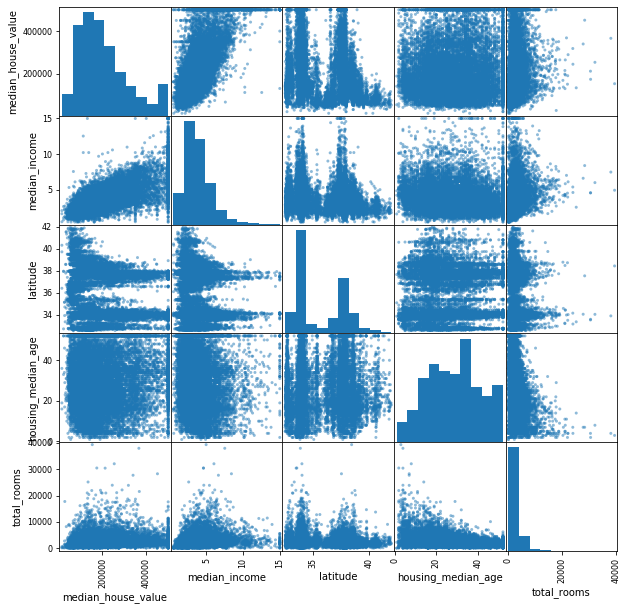

In [30]:
#Scatter Matrix
#On referring to the correlation matrix, we can check relations existing between different attributes of our dataset. 
#Likewise, we can see that the attribute population has a highly positive correlation with attributes total_rooms, total_bedrooms, and households. 
#This is also obvious because where there are more people, they'll require more rooms.

pd.plotting.scatter_matrix(train_copy[["median_house_value", "median_income", "latitude", "housing_median_age", "total_rooms"]], figsize =(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb85b5b9e8>,
      dtype=object)

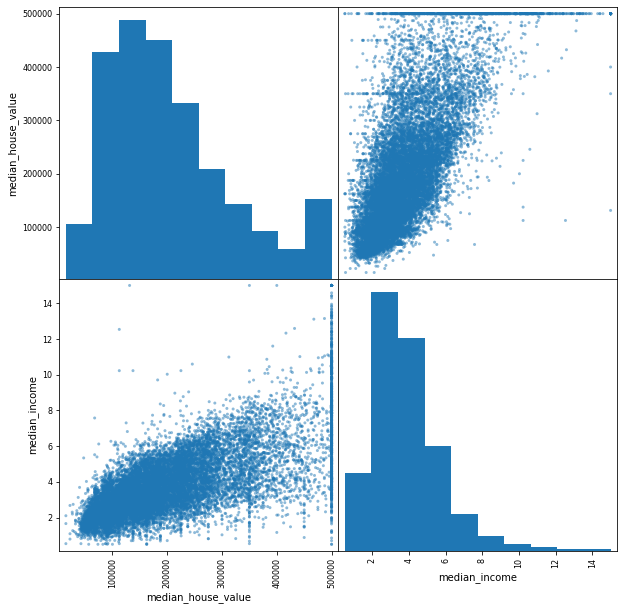

In [31]:
#concluded that the most promising attribute to predict the median_house_value is the median_income.

pd.plotting.scatter_matrix(train_copy[["median_house_value", "median_income"]], figsize =(10,10))

In [32]:
#We divide the number of rooms in each block by its household value. 
#It tells us on average how many rooms are there in a particular block per household.

train_copy["rooms_per_household"] = train_copy["total_rooms"]/train_copy["households"]

In [33]:
#We divide the number of bedrooms in each block by the number of rooms in that particular block. 
#It tells us the average ratio of the number of bedrooms to the number of rooms in a particular block.

train_copy["bedrooms_per_room"] = train_copy["total_bedrooms"]/train_copy["total_rooms"]

In [34]:
#We divide the population of each block by its household value. 
#It will tell us on average how many people live in a particular house in a block.

train_copy["population_per_household"] = train_copy["population"]/train_copy["households"]

In [35]:
print(train_copy)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  media

In [36]:
train_copy.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


In [37]:
#Prepare the Data for Machine Learning Algorithms

train_data= strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [38]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [39]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

## Treating missing values in dataset

In [40]:
#Setting missing value with median value.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Handling categorical and text attributes

In [42]:
housing_num = train_data.drop("ocean_proximity", axis = 1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [43]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [44]:
out = imputer.transform(housing_num)

In [45]:
housing_tr = pd.DataFrame(out, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [46]:
housing_tr.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
dtype: int64

In [47]:
#One Hot Encoding categories

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
one_hot = encoder.fit_transform(train_data[['ocean_proximity']])

In [48]:
one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [49]:
#Creating Custom Transformers

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

In [50]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y =None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, 3] / X[:, 6]
        population_per_household = X[:, 5] / X[:, 6]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        


In [51]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
attr_adder

CombinedAttributesAdder(add_bedrooms_per_room=False)

In [52]:
housing_extra_attribs = attr_adder.transform(train_data.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

## Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(housing_num)

In [54]:
#Transformation Pipelines
#a Pipeline class to create a pipeline to execute all the steps in sequential order. 

from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
          ('imputer',SimpleImputer(strategy="median")), ("attribs_adder", CombinedAttributesAdder()),
          ('std_scaler', StandardScaler())
                ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [55]:
#It would be more convenient if we can create a pipeline that can handle both categorical and numerical attributes by applying the appropriate transformation to each attribute.
#In ColumnTransformer, we can specify the list of numerical and categorical attributes in our dataset, and then it applies each transformation to appropriate columns and at last concatenates the output


from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([("num", num_pipeline, list(housing_num)), ("cat", OneHotEncoder(), ["ocean_proximity"] ) ])
housing_prepared = full_pipeline.fit_transform(train_data)

## Exploring models

In [68]:
# train a LinearRegression model on our training dataset and then predict the target variable for the data points.

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
predictions = lin_reg.predict(housing_prepared)

In [69]:
#measure the model's performance by calculating the error in our predictions using the metric RMSE(Root Mean Square Error)

from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, predictions, squared = False)
lin_rmse

68628.19819848923

- Here, we got 68628.19819848923. It's a huge value for checking the range of the target variable.
- We can say that our model is underfitting.
- It fails to perform well on our training dataset. The features do not provide enough information to make good predictions, or that the model is not powerful enough.
- We can solve the problem of underfitting in 3 ways.
    1. Add more features to the dataset.
    2. Reduce the constraints on the model.
    3. Try a more complex model.
- As there are no constraints on the model, we are left with two options. We'll first try a more complex model and if it doesn't work out, then we will go for creating more features.

In [58]:
#We'll train a DecisionTreeRegressor. 
#It is a powerful algorithm expertised in detecting complex non-linear trends in our data.

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
predictions = tree_reg.predict(housing_prepared)

tree_rmse= mean_squared_error(housing_labels, predictions, squared = False)
tree_rmse

0.0

- Here, we got 0.0. Which means we got exact value as Actual values i.e Actual values = Predicted values.
- Now our model is Overfitted.
- Overfitting happens when our model performs very well on our training data but fails to perform well on our testing data or the real world.
- This is because it memorizes the training data so well that it predicts the value very close to the actual values.
- It even finds patterns in the noise and hence fails to perform well when some other data is given.
- To check our model is overfitting or not as it is not advisable to touch the test set until we are confident about our model. So, here comes the validation set in play.
- We separate some part of the training data and use it as validation data. Then we train our model again on leftover training data and evaluate our model on validation data. This is known as Cross Validation.

In [59]:
#Performing Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring ="neg_root_mean_squared_error", cv = 10)
scores = abs(scores)
scores


array([67973.23224692, 68587.26316929, 71227.38235233, 68744.88060918,
       70868.20997304, 74312.30026208, 70686.82009905, 71361.01243494,
       77403.9165972 , 72134.8284685 ])

In [65]:
print("Mean :", scores.mean())
print("standard deviation :", scores.std())

Mean : 71329.98462125342
standard deviation : 2693.4380714329436


- The mean and standard deviation of the scores very high.
- The DecisionTreeRegressor doesn't look like a good fit. DecisionTreeRegressor is overfitting so badly that it performs even worse than the LinearRegression model as it had a lesser RMSE value than this. 
- Now, we use the Random Forest model.
- Random Forest trains several decision trees on random subsets of the features and averages out all their values while prediction and hence reducing overfitting by a much greater extent.

In [73]:
#Evaluating RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared, housing_labels)
predictions = forest_reg.predict(housing_prepared)
print(predictions)
forest_rmse= mean_squared_error(housing_labels, predictions, squared = False)
forest_rmse

[262352.   334630.03 221478.   ... 102987.   212435.   461417.67]


18682.904880346887

In [74]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring ="neg_root_mean_squared_error", cv = 10)
scores = abs(scores)
scores

array([49273.04563269, 47330.98736944, 49863.36256875, 52285.55464458,
       49471.12686011, 53648.19826918, 48932.28443242, 47857.84140134,
       53241.99675159, 49987.10913078])

In [75]:
print("Mean : ", scores.mean())
print("standard deviation : ", scores.std())

Mean :  50189.15070608871
standard deviation :  2058.284905337484


- The mean and standard deviation of the scores comes as- (50189.15070608871, 2058.284905337484).
- This looks much more promising than our previous two models. However, our model is still overfitting because training RMSE is much less than mean validation RMSE. You can try tuning different hyperparameters of Random Forest or constrain it to reduce overfitting.

## Fine tune the model

- We'll fine tune RandomForestRegressor because other two models (i.e., LinearRegression and DecisionTreeRegressor) performed very badly.
- While fine-tuning the model, we try out different combinations of its hyperparameters and select the combination which gives us the best performance. Different combinations may work out well for different datasets. 
- We can do this manually but it is a tedious process.  perform this task using GridSearchCV from sklearn.
- GridSearchCV takes hyperparameters which we want to experiment with different values as input and evaluates all the possible combinations of the hyperparameters using cross-validation.


In [77]:
# using GridSearchCV from sklearn.

from sklearn.model_selection import GridSearchCV

reg_forest = RandomForestRegressor()
param_grid={'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}

grid_search = GridSearchCV(reg_forest, param_grid, cv = 5, scoring = "neg_root_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

best_param = grid_search.best_params_

In [79]:
#Result of grid search

best_param

{'max_features': 6, 'n_estimators': 30}

In [80]:
#the evaluation scores for all combinations.

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
   print(-mean_score, params)

62616.749355525455 {'max_features': 2, 'n_estimators': 3}
56038.6605856525 {'max_features': 2, 'n_estimators': 10}
52671.41072809768 {'max_features': 2, 'n_estimators': 30}
60340.27143452322 {'max_features': 4, 'n_estimators': 3}
52907.154860494054 {'max_features': 4, 'n_estimators': 10}
50449.552885208905 {'max_features': 4, 'n_estimators': 30}
59329.879261732116 {'max_features': 6, 'n_estimators': 3}
52005.19685054715 {'max_features': 6, 'n_estimators': 10}
49677.56879219997 {'max_features': 6, 'n_estimators': 30}
59086.522682454946 {'max_features': 8, 'n_estimators': 3}
51982.96223443926 {'max_features': 8, 'n_estimators': 10}
49829.93338690912 {'max_features': 8, 'n_estimators': 30}


- A well-trained model is ready now.
- We'll need to preprocess the test data and make it in a format acceptable to our ML model.

## Evaluating the model on the test set

In [82]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test_prepared)

final_rmse = mean_squared_error(y_test, final_predictions,squared = False)

In [83]:
final_rmse

47717.166874885355

- It is not a very good model but our task never was to build a good model as it is only to understand the flow of building a machine learning project. 